In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('TaxiData.csv')

```
Analysis on overall Dataset.
Provide info about columns and its Datatypes.
State missing values and other organic analysis.
```

## Q 1.a

In [ ]:
# Check data shape, summary, ...

# Identify missing values
# Plot missing values (customize as needed)
# missing_values.plot(...)

# Any change of data type conversion required?


In [5]:
df.shape
df.head()

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,payment_type,company,trip_seconds,dropoff_community_area,tips
0,NaN,12.45,5,19,6,1400269500,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,0.0,NaN,0.0
1,NaN,0.00,3,19,5,1362683700,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Unknown,Chicago Elite Cab Corp.,300.0,NaN,0.0
2,60.0,27.05,10,2,3,1380593700,41.836150,-87.648788,NaN,NaN,12.6,NaN,NaN,Cash,Taxi Affiliation Services,1380.0,NaN,0.0
3,10.0,5.85,10,1,2,1382319000,41.985015,-87.804532,NaN,NaN,0.0,NaN,NaN,Cash,Taxi Affiliation Services,180.0,NaN,0.0
4,14.0,16.65,5,7,5,1369897200,41.968069,-87.721559,NaN,NaN,0.0,NaN,NaN,Cash,Dispatch Taxi Affiliation,1080.0,NaN,0.0


In [7]:
# Classify columns 
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
mixed_columns = [col for col in df.columns if col not in categorical_columns + numerical_columns]
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)
print("Mixed columns:", mixed_columns)

Categorical columns: ['payment_type', 'company']
Numerical columns: ['pickup_community_area', 'fare', 'trip_start_month', 'trip_start_hour', 'trip_start_day', 'trip_start_timestamp', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'trip_miles', 'pickup_census_tract', 'dropoff_census_tract', 'trip_seconds', 'dropoff_community_area', 'tips']
Mixed columns: []


Missing Values in Each Column:
 pickup_community_area         2
fare                          0
trip_start_month              0
trip_start_hour               0
trip_start_day                0
trip_start_timestamp          0
pickup_latitude               2
pickup_longitude              2
dropoff_latitude            482
dropoff_longitude           482
trip_miles                    0
pickup_census_tract       15001
dropoff_census_tract       4241
payment_type                  0
company                    5140
trip_seconds                  6
dropoff_community_area      506
tips                          0
dtype: int64


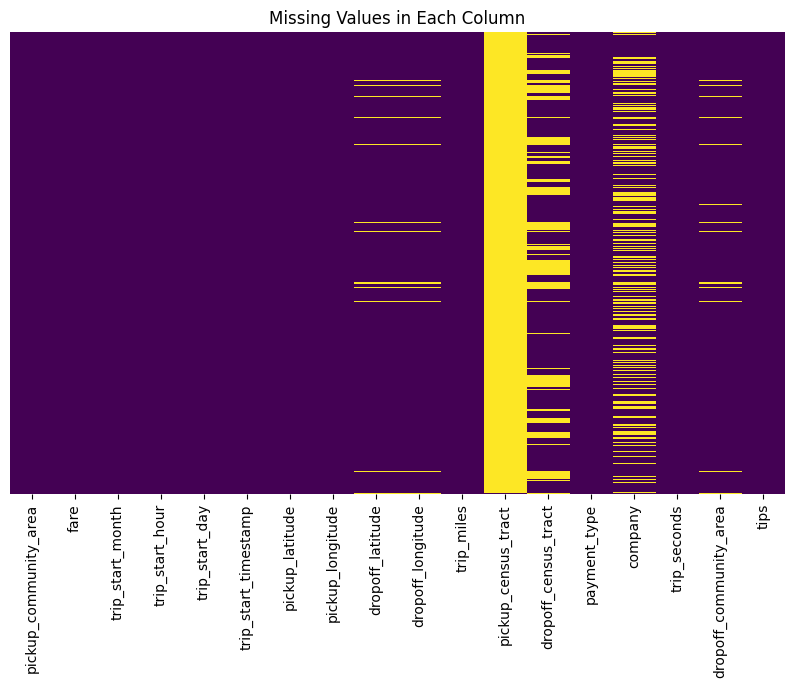

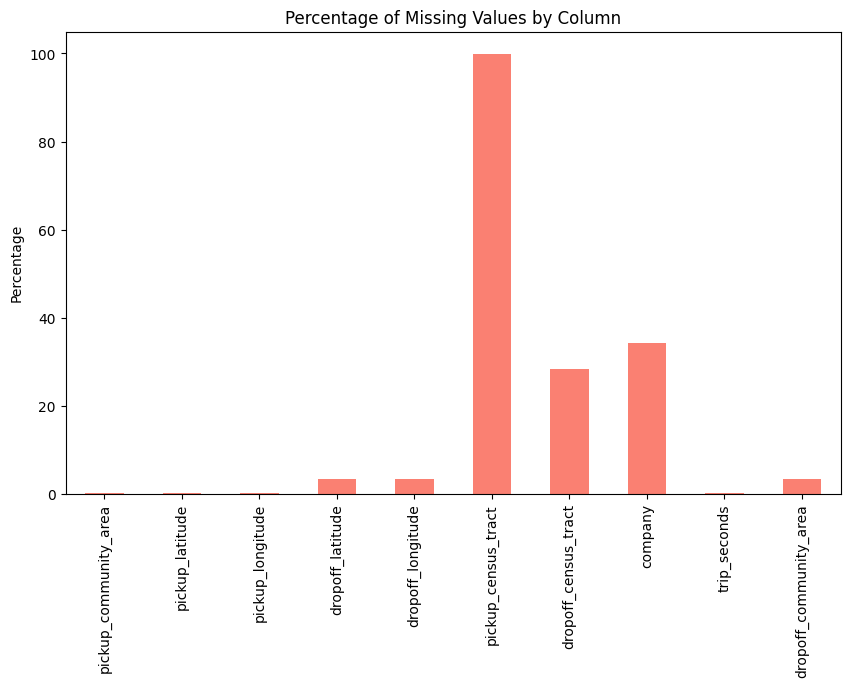

Remaining Missing Values in Each Column After Imputation:
 pickup_community_area     0
fare                      0
trip_start_month          0
trip_start_hour           0
trip_start_day            0
trip_start_timestamp      0
pickup_latitude           0
pickup_longitude          0
dropoff_latitude          0
dropoff_longitude         0
trip_miles                0
pickup_census_tract       0
dropoff_census_tract      0
payment_type              0
company                   0
trip_seconds              0
dropoff_community_area    0
tips                      0
dtype: int64


/tmp/ipykernel_98825/3291741261.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trip_seconds'].fillna(df['trip_seconds'].mean(), inplace=True)
/tmp/ipykernel_98825/3291741261.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data frame (replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# 1. Categorize Columns: Define columns as categorical, numerical, or mixed
categorical_cols = ['pickup_community_area', 'trip_start_month', 'trip_start_hour', 'trip_start_day', 
                    'payment_type', 'company', 'dropoff_community_area']
numerical_cols = ['fare', 'trip_miles', 'trip_seconds', 'tips', 
                  'pickup_latitude', 'pickup_longitude', 
                  'dropoff_latitude', 'dropoff_longitude']
mixed_cols = ['trip_start_timestamp', 'pickup_census_tract', 'dropoff_census_tract']

# 2. Type Conversion: Convert columns to appropriate types

# Convert categorical columns
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Convert numerical columns to appropriate numeric types
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert timestamp to datetime
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'], unit='s', errors='coerce')

# 3. Identify Missing Values: Check for missing values and visualize them

# Check missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Visualize missing values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values in Each Column")
plt.show()

# Bar chart to show the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Only show columns with missing values

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='salmon')
plt.title("Percentage of Missing Values by Column")
plt.ylabel("Percentage")
plt.show()

# 4. Handling Missing Values: Impute or drop missing values based on column type

# Numerical columns: Impute with mean
df['trip_seconds'].fillna(df['trip_seconds'].mean(), inplace=True)

# Categorical columns: Impute with mode (most frequent value)
df['pickup_community_area'].fillna(df['pickup_community_area'].mode()[0], inplace=True)
df['dropoff_community_area'].fillna(df['dropoff_community_area'].mode()[0], inplace=True)
df['company'].fillna(df['company'].mode()[0], inplace=True)

# Mixed columns (e.g., Census Tracts): Impute with a placeholder
df['pickup_census_tract'].fillna('Unknown', inplace=True)
df['dropoff_census_tract'].fillna('Unknown', inplace=True)

# Geolocation Columns: Drop rows with missing latitude/longitude values
df.dropna(subset=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], inplace=True)

# Final check for remaining missing values
print("Remaining Missing Values in Each Column After Imputation:\n", df.isnull().sum())